In [0]:
import io

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras


TensorFlow 2.x selected.


In [0]:
embedding_layer = layers.Embedding(1000, 5)
result = embedding_layer(tf.constant([1,2,3]))
print(result.numpy())
print(result.numpy().shape)


[[ 0.03485984 -0.04709463  0.01560552  0.03925656 -0.04515442]
 [-0.03392035  0.00666856 -0.04724301  0.01998148 -0.02689751]
 [-0.00727018 -0.00951531  0.00504222 -0.01410971  0.01292901]]
(3, 5)


Epoch 1/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6300 - accuracy: 0.6973 - val_loss: 0.5790 - val_accuracy: 0.7450
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.4558 - accuracy: 0.8415 - val_loss: 0.4246 - val_accuracy: 0.8250
Epoch 3/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3537 - accuracy: 0.8824 - val_loss: 0.3599 - val_accuracy: 0.8950
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3024 - accuracy: 0.8973 - val_loss: 0.3351 - val_accuracy: 0.8900
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2677 - accuracy: 0.9089 - val_loss: 0.2827 - val_accuracy: 0.9050
Epoch 6/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2455 - accuracy: 0.9174 - val_loss: 0.3494 - val_accuracy: 0.8750
Epoch 7/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2246 - accuracy: 0.9238 - val_loss: 0.3800 - val_ac

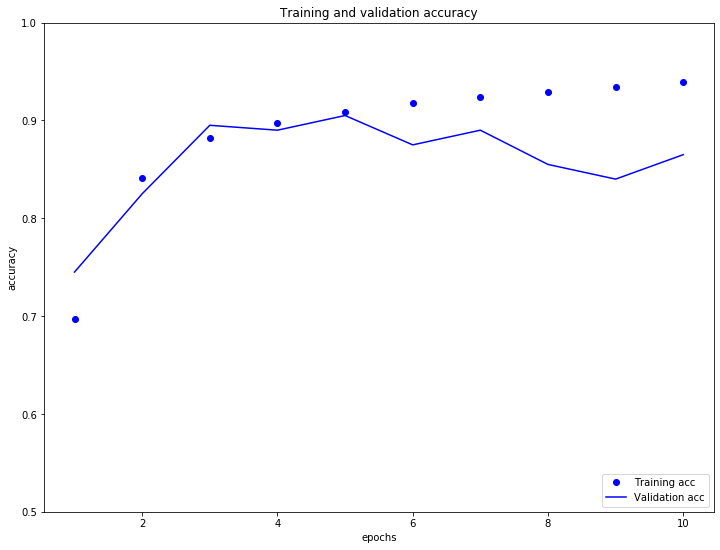

MessageError: ignored

In [0]:
def get_data():
    (train_data, test_data), info = tfds.load(
        'imdb_reviews/subwords8k', 
              split=(tfds.Split.TRAIN, 
                    tfds.Split.TEST), 
              with_info=True, 
              as_supervised= True)

    encoder = info.features['text'].encoder
    #print(encoder.subwords[:20])


    padded_shapes = ([None], ())
    train_batches =  train_data.shuffle(1000).padded_batch(10, 
                                                        padded_shapes = padded_shapes)
    test_batches =  test_data.shuffle(1000).padded_batch(10, 
                                                        padded_shapes = padded_shapes)
    return train_batches, test_batches, encoder
  
def get_model(encoder, embedding_dim = 16):
    model = keras.Sequential([layers.Embedding(encoder.vocab_size,
                                              embedding_dim),
                              layers.GlobalAveragePooling1D(),
                              layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_data(history):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc  = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12,9))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend(loc='lower right')
    plt.ylim([0.5,1])
    plt.show()
def get_embeddings(model,encoder):
    out_vectors = io.open('vecs.tsv' ,'w', encoding='utf=8')
    out_metadata = io.open('meta.tsv' ,'w', encoding='utf=8')
    weights = model.layers[0].get_weights()[0]
    for num, word in enumerate(encoder.subwords):
        vec = weights[num+1]
        out_metadata.write(word + '\n')
        out_vectors.write('\t'.join([str(x) for x in vec]) + '\n')
    out_vectors.close()
    out_metadata.close()
    from google.colab import files
    files.download('vecs.tsv')
    

train_batches, test_batches, encoder = get_data()
model = get_model(encoder)
history = model.fit(train_batches, epochs=10, validation_data = test_batches,
                    validation_steps=20)
plot_data(history)
get_embeddings(model, encoder)




Epoch 1/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6356 - accuracy: 0.7037 - val_loss: 0.5680 - val_accuracy: 0.7800
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.4663 - accuracy: 0.8370 - val_loss: 0.4437 - val_accuracy: 0.8400
Epoch 3/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3649 - accuracy: 0.8780 - val_loss: 0.3833 - val_accuracy: 0.8500
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3081 - accuracy: 0.8956 - val_loss: 0.3304 - val_accuracy: 0.8600
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2745 - accuracy: 0.9083 - val_loss: 0.3399 - val_accuracy: 0.8900
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2492 - accuracy: 0.9165 - val_loss: 0.3144 - val_accuracy: 0.8650
Epoch 7/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2311 - accuracy: 0.9236 - val_loss: 0.2860 - val_ac

NameError: ignored

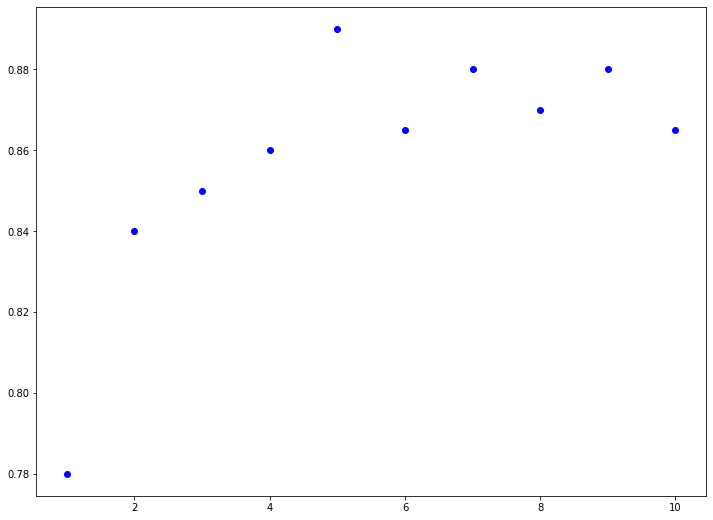